In [1]:
import sys
import datetime as dt
import numpy as np
import pprint
from jeffutils.utils import reimport

from sklearn.model_selection import train_test_split

sys.path.append('../')
from experimenter import *
reimport(["from experimenter import *"], globals())

# Load Data

source: https://www.cs.toronto.edu/~kriz/cifar.html


Citation:
Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.
https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# load cifar dataset from files
batch1 = unpickle('data/cifar-10-batches-py/data_batch_1')
X = batch1[b'data']
y = np.array(batch1[b'labels'])

# split data
test_size = 0.2
train_size = 1 - test_size
random_state = 42
first_size = 50
n_classes = len(set(y))
count = 0
print("Shuffling:", end=" ")
while True:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, shuffle=True)
    # make sure there are at least lmnn_default_params of each class in the training set
    if all([sum(y_train[:first_size] == uclass) >= lmnn_default_neighbors for uclass in set(y_train)]):
        break
    count += 1
    print(count, end=", ")
print(f"\nTrain set has {len(set(y_train))} classes and test set has {len(set(y_test))} classes")
print("X shape: ", X_train.shape)
print("y shape: ", y_train.shape)

# remember to do any preprocessing necessary for the data

Shuffling: 
Train set has 10 classes and test set has 10 classes
X shape:  (8000, 3072)
y shape:  (8000,)


## Global Variables

In [3]:
# customize based on training data
dataset_name = "cifar10"
data_sizes = [first_size, 100, 500, 2000, 8000]
datetime = dt.datetime.now().strftime(date_format)
experiment_info = (dataset_name, data_sizes, X_train, y_train, X_test, y_test)
constants = (data_sizes, datetime, dataset_name)
pp = pprint.PrettyPrinter(indent=4)

# Model Training

In [4]:
# RANDOM FOREST
new_set = False
if new_set:
    datetime = dt.datetime.now().strftime(date_format)
model_name = 'randomforest'

rfr_results = benchmark_ml(model_name, experiment_info, datetime)
benchmarking.update(rfr_results)

Benchmarking randomforest: 100%|██████████| 25/25 [02:26<00:00,  5.86s/it]


In [5]:
# K NEAREST NEIGHBORS
new_set = False
if new_set:
    datetime = dt.datetime.now().strftime(date_format)
model_name = 'knn'

knn_results = benchmark_ml(model_name, experiment_info, datetime, repeat=1)
benchmarking.update(knn_results)

Benchmarking knn: 100%|██████████| 5/5 [00:20<00:00,  4.13s/it]


In [6]:
# CONVULUTIONAL NEURAL NETWORK
new_set = False
if new_set:
    datetime = dt.datetime.now().strftime(date_format)
model_name = 'cnn'

In [7]:
# METRIC LEARNING
new_set = False
if new_set:
    datetime = dt.datetime.now().strftime(date_format)
model_name = 'metric'

metric_results = benchmark_ml(model_name, experiment_info, datetime, repeat=1)
benchmarking.update(metric_results)

Benchmarking metric:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# OUR MODEL
new_set = False
if new_set:
    datetime = dt.datetime.now().strftime(date_format)
model_name = 'ours'

# acme_results = benchmark_ml(model_name, experiment_info, datetime)
# benchmarking.update(acme_results)

# Model Evaluation

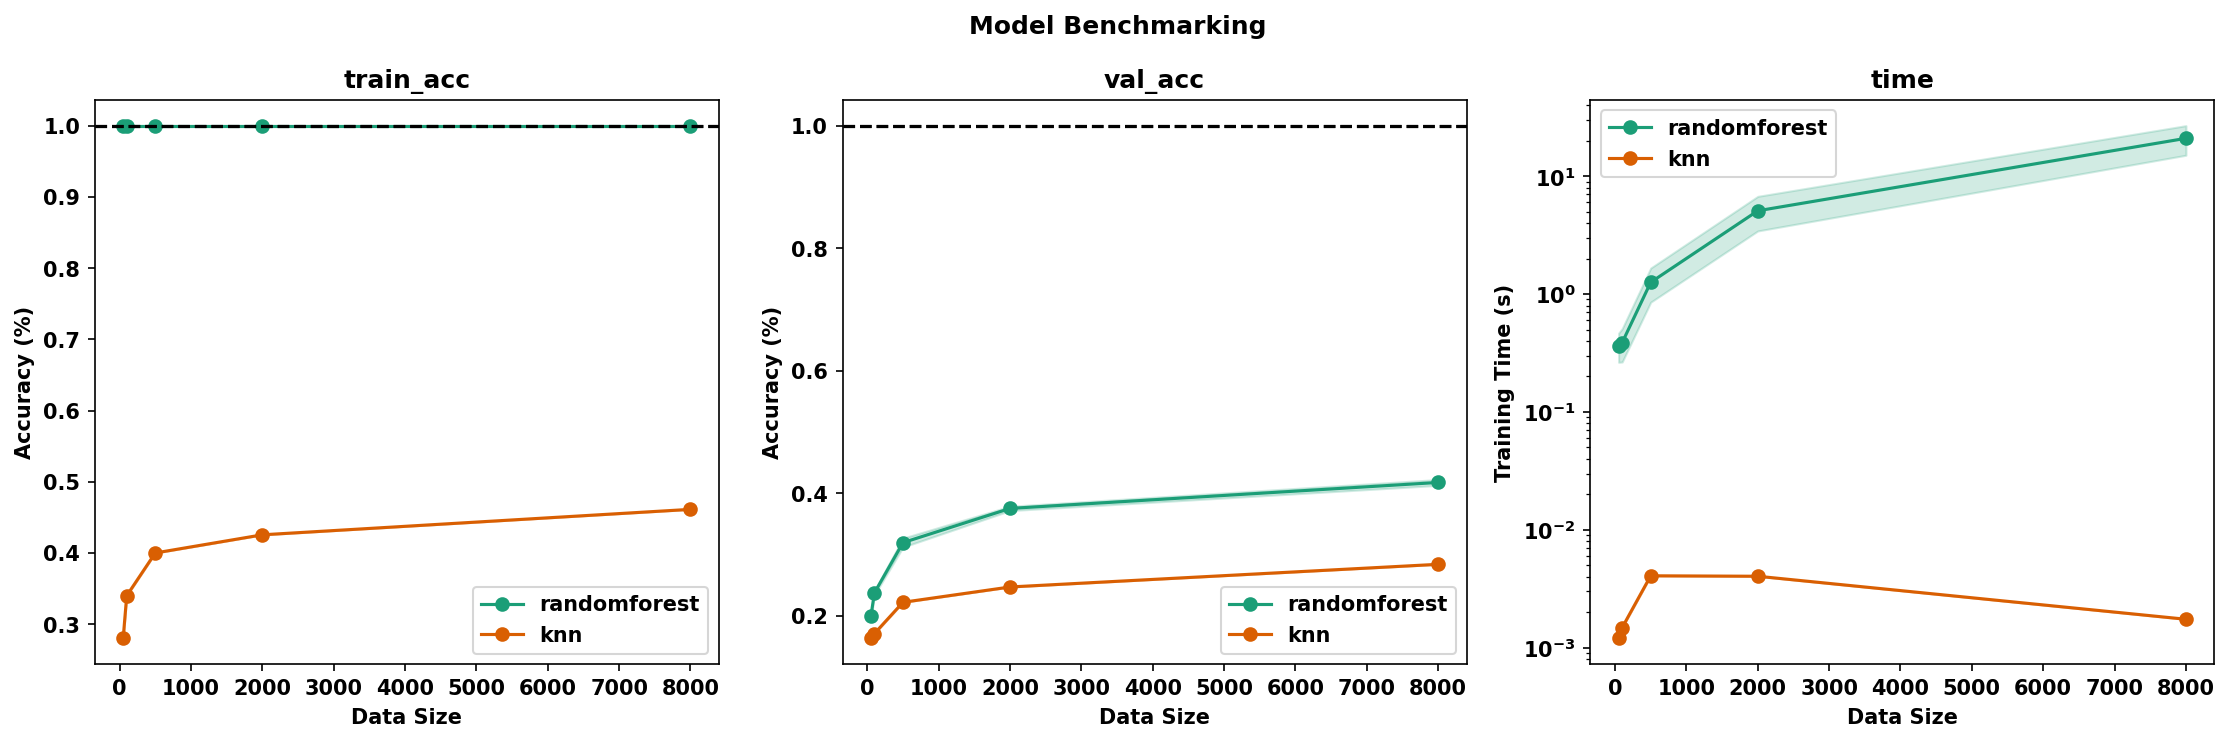

In [8]:
plot_results(benchmarking, constants, 
             save_fig=True, replace_fig=True, from_data=False)

In [ ]:
# pretty print the benchmarking results
pp.pprint(benchmarking)

{   'knn': {   0: {   'time': array([0.0011849, 0.0007722, 0.0012264, 0.0019127, 0.0034688]),
                      'train_acc': array([0.28   , 0.34   , 0.4    , 0.4255 , 0.46125]),
                      'val_acc': array([0.163, 0.171, 0.222, 0.247, 0.284])},
               1: {   'time': array([0.0034777, 0.0016011, 0.0014321, 0.0021586, 0.0032445]),
                      'train_acc': array([0.28   , 0.34   , 0.4    , 0.4255 , 0.46125]),
                      'val_acc': array([0.163, 0.171, 0.222, 0.247, 0.284])},
               2: {   'time': array([0.0012651, 0.0011988, 0.0027327, 0.0021037, 0.0026606]),
                      'train_acc': array([0.28   , 0.34   , 0.4    , 0.4255 , 0.46125]),
                      'val_acc': array([0.163, 0.171, 0.222, 0.247, 0.284])},
               3: {   'time': array([0.0012859, 0.0011739, 0.0013342, 0.0015623, 0.0019572]),
                      'train_acc': array([0.28   , 0.34   , 0.4    , 0.4255 , 0.46125]),
                      'val_acc': a